## Keras
see the [doc](https://faroit.github.io/keras-docs/1.0.0/getting-started/sequential-model-guide/) on how to use sequential

### Preliminary

In [1]:
import pandas as pd
import numpy as np

# visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# pre-processing
from sklearn.model_selection import train_test_split

# deep learning algo
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

# model eval
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Using TensorFlow backend.


In [6]:
data = pd.read_csv( 'data/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
X_train, X_test, y_train, y_test = train_test_split( 
                                    data.drop(columns=['Outcome']), 
                                    data['Outcome'],
                                    test_size = 0.3,
                                    random_state = 0
                                    )

### Deep Learning
Using `keras` with `tensorflow` backend

In [91]:
def create_classifier():
    # initialising the ANN
    classifier = Sequential()

    # Add input layer and first hidden layer
    classifier.add( Dense( units = 6, kernel_initializer= 'uniform', activation= 'relu', input_dim = 8))

    # Second layer
    classifier.add( Dense( units = 6, kernel_initializer= 'uniform', activation= 'relu'))

    # Output layer: sigmoid for binary classification
    classifier.add( Dense(units = 1, kernel_initializer= 'uniform', activation = 'sigmoid'))
    
    # compile the ANN
    classifier.compile( optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [93]:
classifier = create_classifier()
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_32 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 7         
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


In [102]:
no_epochs = 100
classifier.fit( X_train, y_train, 
               batch_size= 10, 
               epochs= no_epochs,
               verbose = 0
              )
predict = classifier.predict_classes( X_test )
accuracy = classifier.evaluate( X_test, y_test)
print( f'{classifier.metrics_names}\n{accuracy}')

231/231 [==============================] - 0s 44us/step
['loss', 'acc']
[0.5286782069123669, 0.7402597403887546]


`loss` here is the valuation from the [loss function](https://keras.io/losses/) which is what we are trying to optimize

### Model Evaluation

In [103]:
model = KerasClassifier( build_fn = create_classifier, nb_epoch = no_epochs, batch_size = 10, verbose = 0)
cv_score = cross_val_score( model, X_train, y_train, 
                          cv = 10, 
                          n_jobs = 1                 # only use 1 CPU
                          )
print(f'Reults:\n Mean Accuracy = {"{:.2f}".format(cv_score.mean() * 100)}%\n with Std = {"{:.2f}".format(cv_score.std() * 100)}%')

Reults:
 Mean Accuracy = 63.70%
 with Std = 3.93%


### Visualize results

Text(0.5,1,'Predicted from Keras')

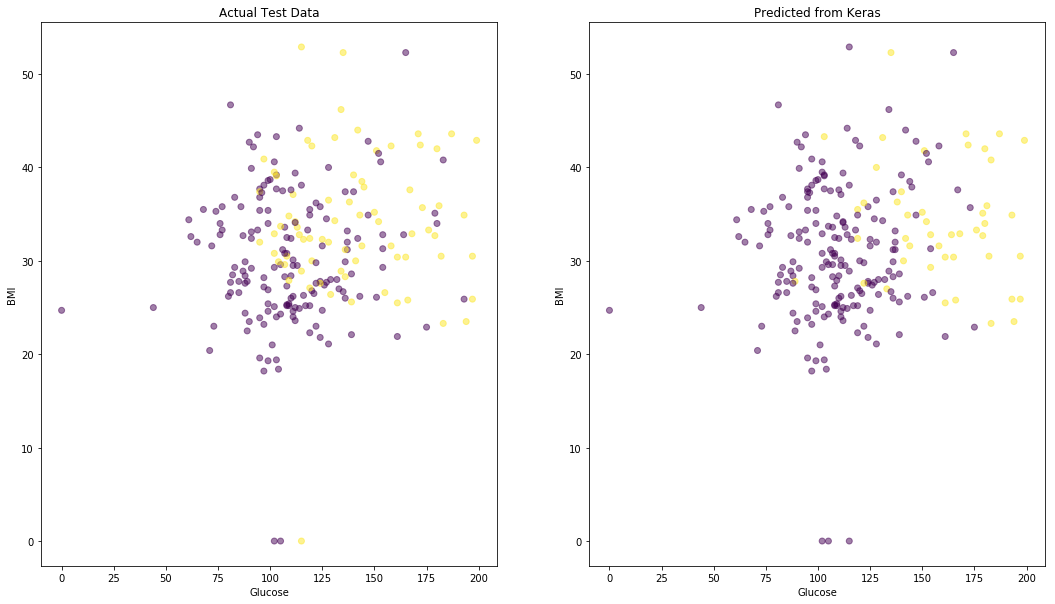

In [104]:
color_dict = { 0: 'blue',  1: 'red'}

fig, axe = plt.subplots(1,2, figsize = (18,10))

axe[0].scatter (
    x = X_test['Glucose'],
    y = X_test['BMI'],
    c = y_test, #y_test['Outcome'].apply( lambda x: color_dict[x]),
    alpha = 0.5
)
axe[0].set_ylabel('BMI')
axe[0].set_xlabel('Glucose')
axe[0].set_title( 'Actual Test Data')

axe[1].scatter (
    x = X_test['Glucose'],
    y = X_test['BMI'],
    c = pd.Series(list(predict)),
    alpha = 0.5
)
axe[1].set_ylabel('BMI')
axe[1].set_xlabel('Glucose')
axe[1].set_title( 'Predicted from Keras')

## Reference:
* [Binary Classification Tutorial with Keras](https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/)
* [How to Make Predictions with Keras](https://machinelearningmastery.com/how-to-make-classification-and-regression-predictions-for-deep-learning-models-in-keras/)
    * use the `model.predict_class()` function to get the actual classification
    * and has notes on Class Labeling
* [Example code from class](https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/)